In [6]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import matplotlib as mpl

my_dateparser = lambda x: pd.datetime.strptime(x, "%Y %m %d %H %M")

path = 'shared-ns1000k/inputs/Aerosol_sizedist_obs/' 
all_files = glob.glob(path + "/Station_Nord_201*_hourly.csv")


myorder = [3, 2, 0, 1]
mylist = [all_files[i] for i in myorder]
  
li = []

for filename in mylist:
    df = pd.read_csv(filename, parse_dates=[['0', '0.1', '0.2', '0.3', '0.4']], date_parser = my_dateparser)
    li.append(df)


df = pd.concat(li, axis=0, ignore_index=True)

df.rename(columns={'0_0.1_0.2_0.3_0.4':'Time'},inplace = True)
df.replace(-999, np.nan, inplace=True)
df.drop(labels=['0.5','0.6'], axis=1, inplace=True)
df = df.set_index('Time')
df

,20,22.44,25.179,28.251,31.698,35.566,39.905,44.774,50.238,56.368,...,178.25,200,224.4,251.79,282.51,316.98,355.66,399.05,447.74,502.38
Time,,,,,,,,,,,,,,,,,,,,,
2010-07-07 00:00:00,128.6500,126.9900,139.6700,149.3400,165.820,169.650,187.510,197.750,214.340,203.730,...,135.76,116.630,91.448,69.047,50.439,35.236,22.678,14.735,8.9347,4.1436
2010-07-07 01:00:00,142.5200,135.4300,147.0700,139.2400,141.190,141.060,150.180,151.720,167.890,175.830,...,127.48,95.335,78.890,59.925,44.050,32.284,19.935,13.537,6.4738,3.4326
2010-07-07 02:00:00,162.9700,167.5000,170.1800,156.6800,140.020,142.900,135.500,148.700,162.690,176.470,...,138.84,111.020,90.088,69.359,52.588,37.303,24.685,15.336,8.2478,4.5645
2010-07-07 03:00:00,204.5800,219.6600,219.6300,206.5200,196.520,173.940,147.350,147.300,147.140,153.780,...,111.31,93.899,76.940,55.176,41.100,27.840,16.733,11.408,6.8561,3.8129
2010-07-07 04:00:00,214.4400,240.9200,268.1500,276.0500,286.490,266.620,222.980,192.410,170.270,159.820,...,104.40,92.404,72.497,55.296,43.028,27.762,18.217,12.484,6.9652,3.8685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-12-31 19:00:00,2.3852,1.6169,5.9581,7.0585,11.437,19.874,24.573,32.347,37.406,40.055,...,288.72,311.860,298.500,250.810,183.840,129.730,85.915,51.917,33.2940,17.8550
2013-12-31 20:00:00,2.0354,2.6995,4.8646,8.6929,11.924,19.435,29.183,36.526,43.307,43.851,...,291.47,316.820,301.820,256.060,192.160,133.380,86.822,55.801,33.8890,19.3720
2013-12-31 21:00:00,1.3631,4.5269,4.1257,11.0030,13.544,22.086,29.118,35.592,42.276,47.847,...,292.76,315.630,300.060,251.300,190.420,136.240,89.902,54.446,33.1140,20.1400


In [7]:
diam = df.columns
diam = ([float(ii) for ii in diam])
time = df.index
data = xr.DataArray(df.values,dims={'Time':time, 'Diameter':diam})
datas = xr.Dataset({'SizeDist':data})
datas['Time']=time
datas['Diameter']=diam

/opt/conda/lib/python3.7/site-packages/matplotlib/colors.py:1031: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


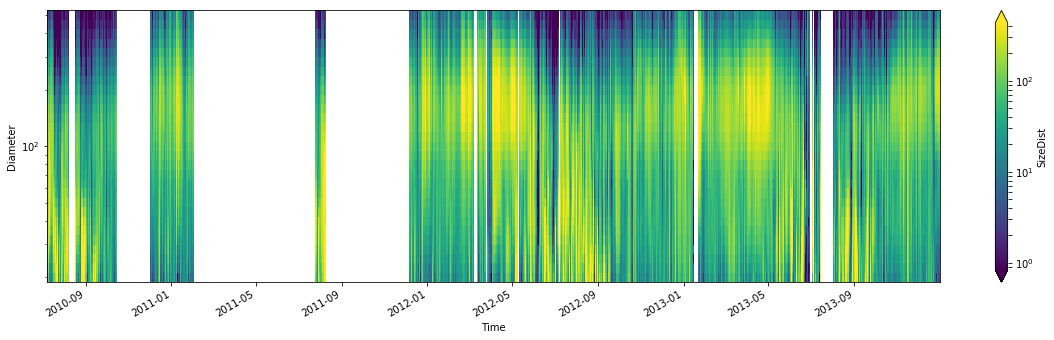

In [8]:
plt.figure(figsize=(20,5))
datas['SizeDist'].plot(x='Time', robust=True, yscale='log', norm=mpl.colors.LogNorm())

In [9]:
df_weekly = df.resample('w').mean()

In [10]:
diam = df_weekly.columns
diam = ([float(ii) for ii in diam])
time = df_weekly.index
data_w = xr.DataArray(df_weekly.values,dims={'Time':time, 'Diameter':diam})
datas_w = xr.Dataset({'SizeDist':data_w})
datas_w['Time']=time
datas_w['Diameter']=diam

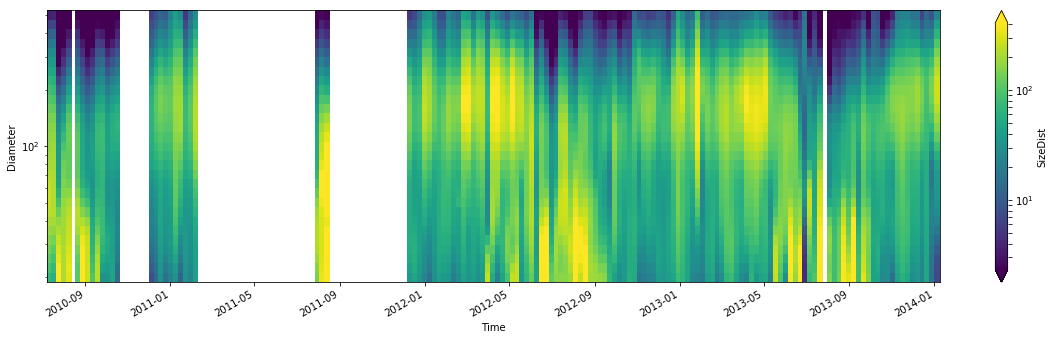

In [11]:
plt.figure(figsize=(20,5))
datas_w['SizeDist'].plot(x='Time', robust=True, yscale='log', norm=mpl.colors.LogNorm())